# Task 2 - Credit Risk Prediction

## Objective 
Predict whether a loan applicant is likely to default or not using classification algorithms like logistic regression or decision tree.

This involves:
 - Loading and understanding the dataset
 - Cleaning and preparing the dataset
 - Visualizing key variables
 - Training a machine leaning model
 - Evaluating performance using accuracy and a confusion matrix

## 1. Loading and understanding the dataset

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# Loading the dataset and previewing it
df = pd.read_csv("data.csv")

df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


Here is some more info about the dataset

In [17]:
df.shape         # Number of rows and columns

(10000, 5)

In [18]:
df.columns       # List of column names


Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [19]:
df.info()        # Data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [20]:
df.describe()    # Summary statistics for numeric columns

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [21]:
df.isnull().sum()        # Checking how many null values are in the dataset's columns

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

## 2. Cleaning and Preparing the dataset

### Drop irrelevant columns (Load_ID)

In [22]:
# Dropping the irrelevant columns as we dont really need these for model training or visualizations
df.drop('Index', axis=1, inplace=True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


### Fill missing values
Since there are no missing values in our dataset, so we dont need to perform any further data cleaning activities. If we had null values, we could have used simple strategies like filling with mode or median.

Verifying that there are no nulls remaining

## 3. Visualizing key variables and Exploratory Data Analysis

Let's now make graphs for:
 - Default Rate
 - Bank Balance vs. Default
 - Annual Salary vs. Default


### Check default Rate

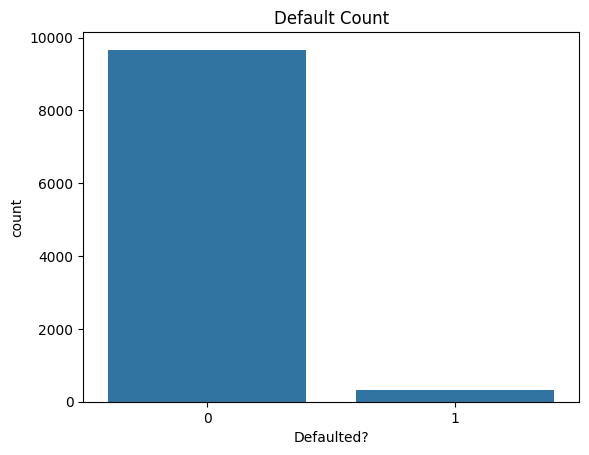

In [23]:
sns.countplot(x='Defaulted?', data=df)
plt.title('Default Count')
plt.show()

This shows that very few of the population leads to defaulting their loan. Most people pay it back on time!

### Bank Balance vs. Default

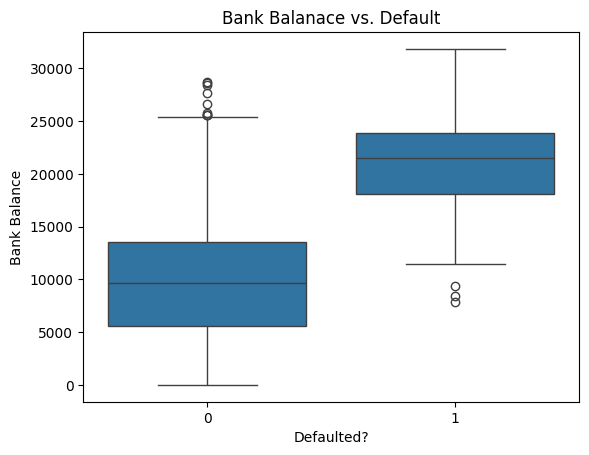

In [24]:
sns.boxplot(x='Defaulted?', y='Bank Balance', data=df)
plt.title('Bank Balanace vs. Default')
plt.show()

This shows that people with greater bank balance tend to default more than the people with lower bank balance! Ironic!

### Annual Salary vs. Default

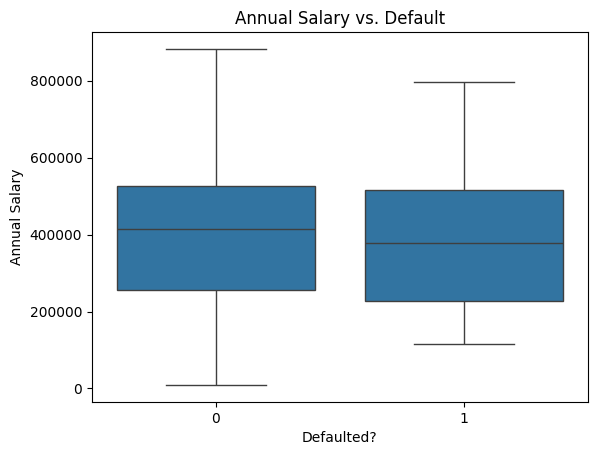

In [25]:
sns.boxplot(x='Defaulted?', y='Annual Salary', data=df)
plt.title('Annual Salary vs. Default')
plt.show()

## 4. Training a Machine Learning Model

Now we'll prepare our feature and target variable to create a model that predicts whether a loan will get defaulted or not!

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Defaulted?', axis = 1)
y = df['Defaulted?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Train a logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)

print('Logistic Regression accuracy: ', log_accuracy, ' or ', log_accuracy*100, '%')
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

Logistic Regression accuracy:  0.9695  or  96.95 %
Confusion Matrix:
 [[1920   11]
 [  50   19]]


### Train a Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)

print('Decision Tree Accuracy:', tree_accuracy, ' or ', tree_accuracy*100, '%')
print('Confusion Matrix:\n', confusion_matrix(y_test, tree_preds))

Decision Tree Accuracy: 0.953  or  95.3 %
Confusion Matrix:
 [[1885   46]
 [  48   21]]


# Conclusion

- The dataset was clean and contained a proper target column (`Defaulted?`)
- Visualizations showed relationships between income, balance, and default status
- Two models were trained: Logistic Regression and Decision Tree
- Accuracy and confusion matrix were used to evaluate results
- The logistic regression model achieved a 96.95% accuracy and the decision tree model achieved a 95.3% accuracy